In [30]:
import sympy as sp
from sympy.abc import t, u, v, w
from einsteinpy.symbolic import MetricTensor, RicciTensor, RicciScalar, RiemannCurvatureTensor, EinsteinTensor
from einsteinpy.symbolic.christoffel import ChristoffelSymbols
import numpy as np
from IPython.display import Markdown as md
from IPython.display import display, Latex

sp.init_printing()
f = sp.Function('f')(u, v)

('t', 't')

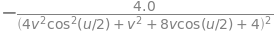

('w', 'w')

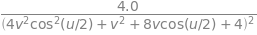

In [31]:
vars_ = ["t", "u", "v", "w"] 

def print_ein(ein):
    ein = ein.simplify()
    for i, c1 in enumerate(vars_):
        for j, c2 in enumerate(vars_):
            if ein[i, j] != (u - u).simplify():
                display((c1, c2), ein[i, j])
                print("\n\n")

print_ein(einstein)

From Wikipedia we have that the Mobius strip is parametrized by
\begin{align*}
x(u, v) &= \bigg(1+{v}\cos\bigg(\frac{u}{2}\bigg)\bigg)\cos u \\
y(u, v) &= \bigg(1+{v}\cos\bigg(\frac{u}{2}\bigg)\bigg)\sin u \\
z(u, v) &= {v}\sin \bigg(\frac{u}{2} \bigg),
\end{align*}
for $(u, v) \in [0, 2\pi) \times [-0.5, 0.5]$.

In [12]:
x = (1+v * sp.cos(u/2))*sp.cos(u)
y = (1+v * sp.cos(u/2))*sp.sin(u)
z = v * sp.sin(u/2)

dxu = x.diff(u)
dxv = x.diff(v)
dyu = y.diff(u)
dyv = y.diff(v)
dzu = z.diff(u)
dzv = z.diff(v)

du2 = (dxu**2 + dyu**2 + dzu**2).simplify()
dv2 = (dxv**2 + dyv**2 + dzv**2).simplify()

ds_ = [du2, dv2]

out = "ds^2 ="
vars_ = ["u", "v"] 

for i in range(2):
    out += f"+\\left({sp.latex(ds_[i].simplify())}\\right)d{vars_[i]}^2"
    
md("Line element: \n$${}$$".format(out))

Line element: 
$$ds^2 =+\left(v^{2} \cos^{2}{\left(\frac{u}{2} \right)} + \frac{v^{2}}{4} + 2 v \cos{\left(\frac{u}{2} \right)} + 1\right)du^2+\left(1\right)dv^2$$

('t', 't')

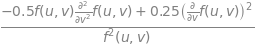

('w', 'w')

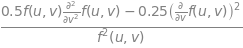

In [32]:
g = MetricTensor(
    sp.Array(
        np.diag([1, -f, -1, -1]
               )
    ),
    syms=[t, u, v, w]
)
    
g.tensor()

einstein = EinsteinTensor.from_metric(g)
einstein.tensor()

out = "ds^2 ="
vars_ = ["t", "u", "v", "w"] 

einstein.tensor().simplify()
print_ein(einstein)

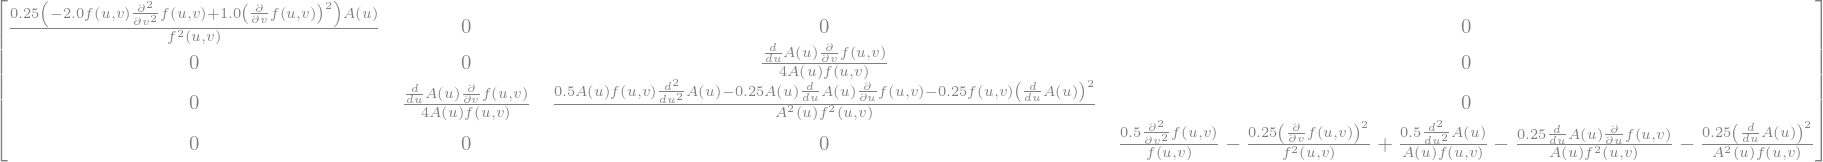

In [6]:
A = sp.Function("A")(u)
B = sp.Function("B")(v)

g = MetricTensor(
    sp.Array(
        np.diag([A, -f, -1, -1]
               )
    ),
    syms=[t, u, v, w]
)
    
g.tensor()

einstein = EinsteinTensor.from_metric(g)
einstein.tensor()

out = "ds^2 ="
vars_ = ["t", "u", "v", "w"] 

einstein.tensor().simplify()

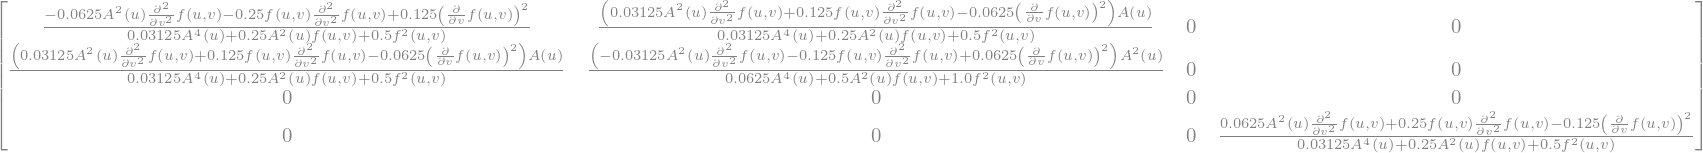

In [8]:
A = sp.Function("A")(u)
B = sp.Function("B")(v)

arr = np.array([
   # t  u  v  w 
    [1, -0.5*A, 0, 0],
    [-0.5*A, -f, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, -1]
] 
)

g = MetricTensor(
    sp.Array(
        arr       
    ),
    syms=[t, u, v, w]
)
    
g.tensor()

einstein = EinsteinTensor.from_metric(g)
einstein.tensor().simplify()

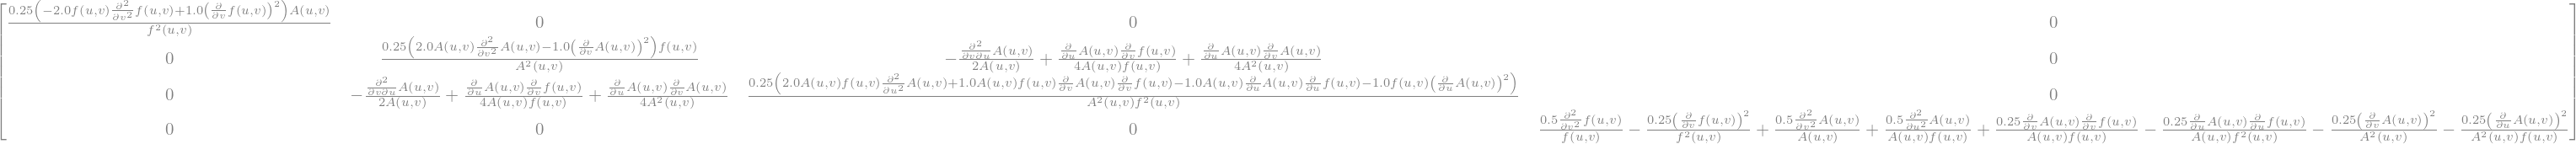

In [9]:
A = sp.Function("A")(u, v)

g = MetricTensor(
    sp.Array(
        np.diag([A, -f, -1, -1]
               )
    ),
    syms=[t, u, v, w]
)
    
g.tensor()

einstein = EinsteinTensor.from_metric(g)
einstein.tensor()

out = "ds^2 ="
vars_ = ["t", "u", "v", "w"] 

einstein.tensor().simplify()

## Anstaz $ds^2 = A(u, v)dt^2 - f(u, v)du^2 - dv^2 - B(u, v)dw^2$

('t', 't')

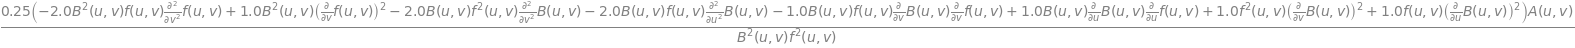

('u', 'u')

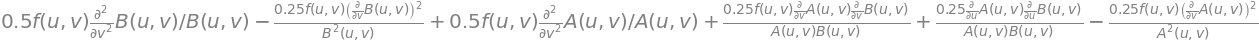

('u', 'v')

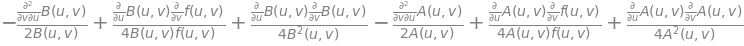

('v', 'u')

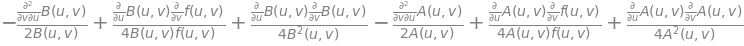

('v', 'v')

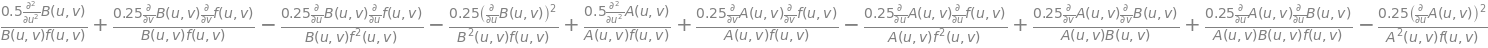

('w', 'w')

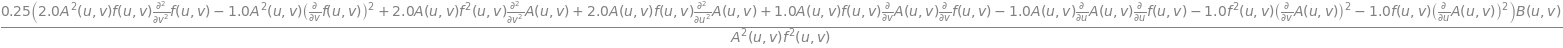

In [50]:
A = sp.Function("A")(u, v)
B = sp.Function("B")(u, v)

g = MetricTensor(
    sp.Array(
        np.diag([A, -f, -1, -B]
               )
    ),
    syms=[t, u, v, w]
)
    
g.tensor()

einstein = EinsteinTensor.from_metric(g)
einstein.tensor()

out = "ds^2 ="
vars_ = ["t", "u", "v", "w"] 

print_ein(einstein.tensor())

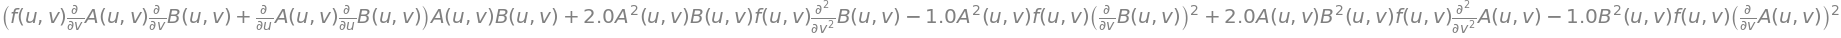

In [46]:
(4*A**2*B**2*einstein[1, 1]).simplify()

('t', 't')

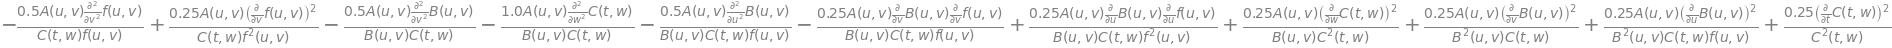

('t', 'u')

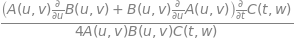

('t', 'v')

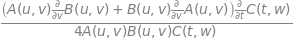

('t', 'w')

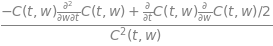

('u', 't')

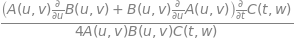

('u', 'u')

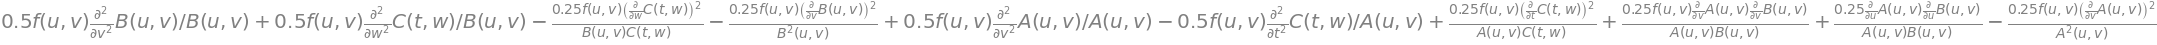

('u', 'v')

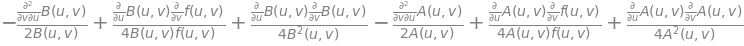

('u', 'w')

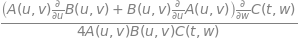

('v', 't')

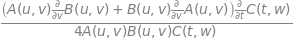

('v', 'u')

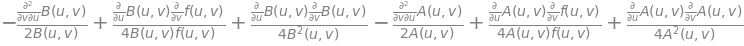

('v', 'v')

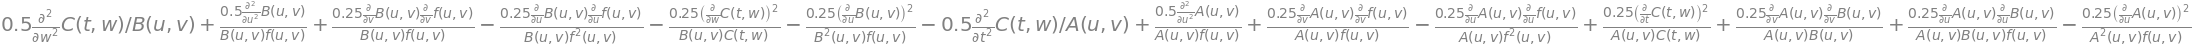

('v', 'w')

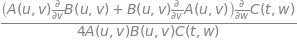

('w', 't')

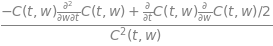

('w', 'u')

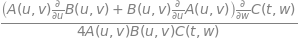

('w', 'v')

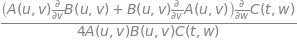

('w', 'w')

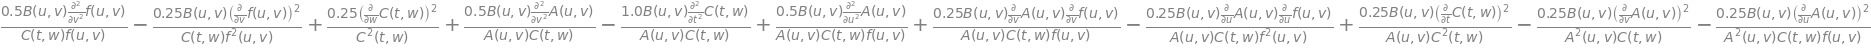

In [37]:
A = sp.Function("A")(u, v)
B = sp.Function("B")(u, v)
C = sp.Function("C")(t, w)

g = MetricTensor(
    sp.Array(
        np.diag([A, -C*f, -C, -B]
               )
    ),
    syms=[t, u, v, w]
)
    
g.tensor()

einstein = EinsteinTensor.from_metric(g)
einstein.tensor()

out = "ds^2 ="
vars_ = ["t", "u", "v", "w"] 

print_ein(einstein)